<center><h1>Guan_Haoyu_HW2</h1></center>
<br>
<br>

Name: Haoyu Guan
<br>
Github Username: ghyharry
<br>
USC ID: 7418934031

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff as arff
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, f1_score , precision_score, accuracy_score, classification_report, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures, normalize
from sklearn.model_selection import train_test_split

C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

There are 9568 rows and 5 columns. Each row represents a sample point, with average value of each feature and label in that hour. The first four columns are features: Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). We use the value of each column with time to study the relationship between them and our fifth column: the net hourly electrical energy output (PE), our label.

#### ii. pairwise scatterplots of all the varianbles

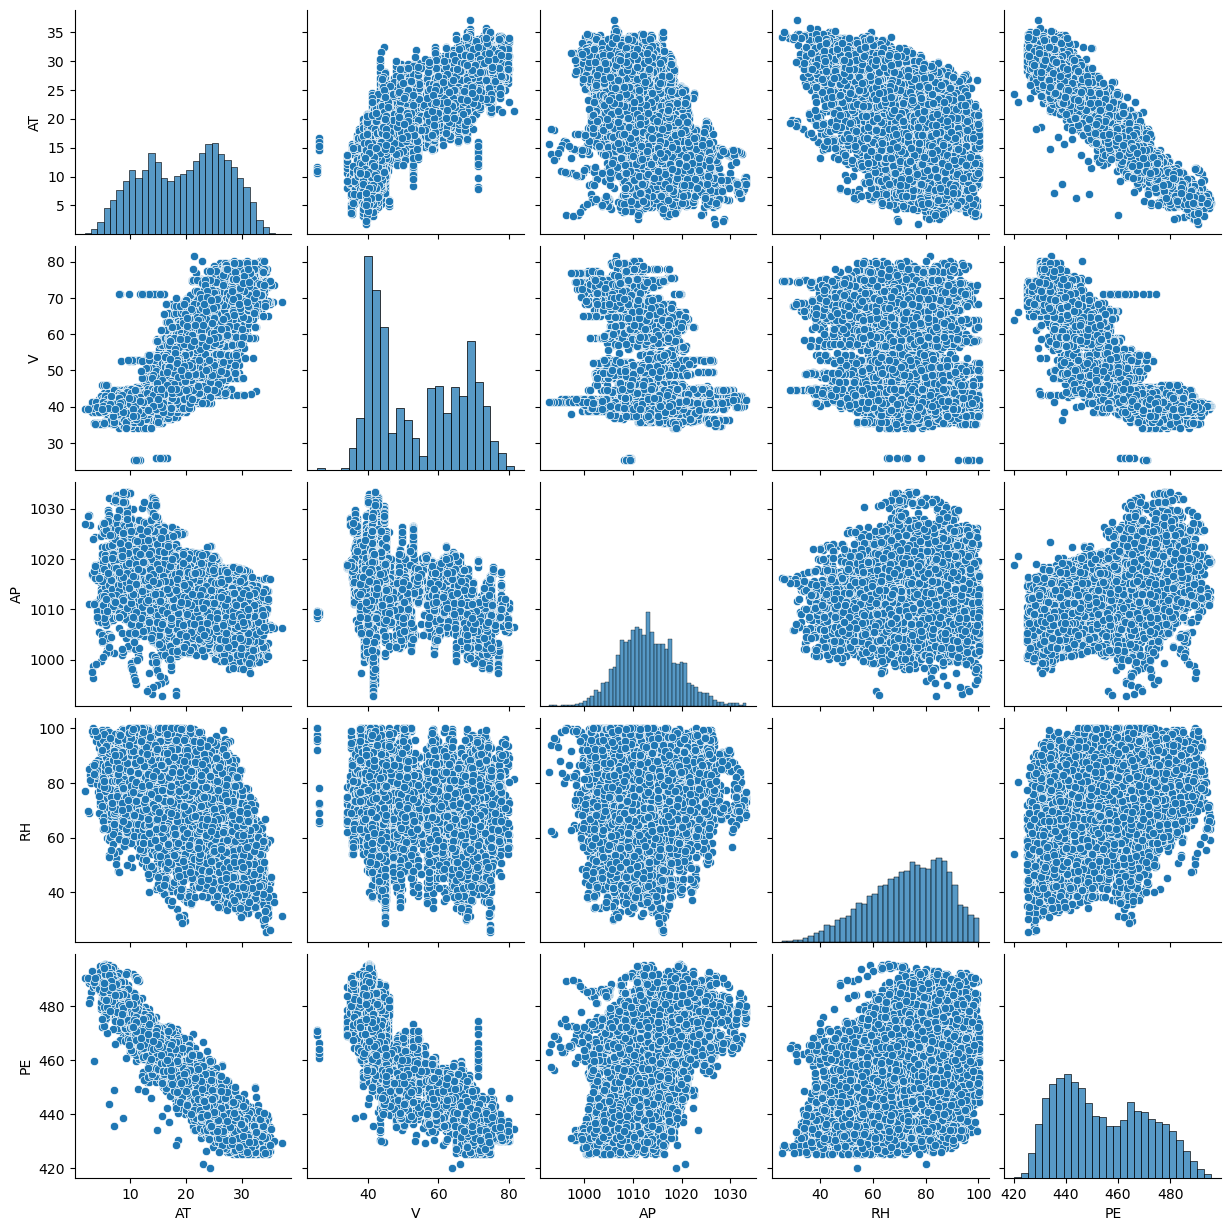

In [3]:
sns.pairplot(df)

In [4]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


We can find that AT has a strong positive correlation with V and a negative relation with PE. V also has a negative correlation with PE. AP and RH have weak negative correlation with AT and weak positive relation with PE. There is nearly no correlation between AP and RH.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
describe=df.describe()
therange=describe.loc['max']-describe.loc['min']
interq=describe.loc['75%']-describe.loc['25%']
describe=describe.append(pd.Series(therange,name='range'))
describe.append(pd.Series(interq,name='interquartile'))

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

AT vs PE

In [6]:
xtrain = df.loc[:, df.columns != 'PE']
ytrain = df['PE'].copy()
ATt = xtrain['AT'].copy()
ATt=ATt.values.reshape(-1, 1)
reg = LinearRegression().fit(ATt, ytrain)
ypred=reg.predict(ATt)
reg.score(ATt,ytrain)
#but i need p value as well

0.8989475964148236

In [7]:
simplelr = []

x = sm.add_constant(df['AT'])
model = sm.OLS(ytrain, x)
res = model.fit()
print(res.summary())
simplelr.append(res.params['AT'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:30   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

We can see that R^2 is about 0.899 close to 1, and the p value is 0, <0.05, which means the null hypothesis is rejected, and there is a statistically significant
association between the predictor and the response in AT vs PE.Our model is good enough to show this relation.

<AxesSubplot:xlabel='AT', ylabel='PE'>

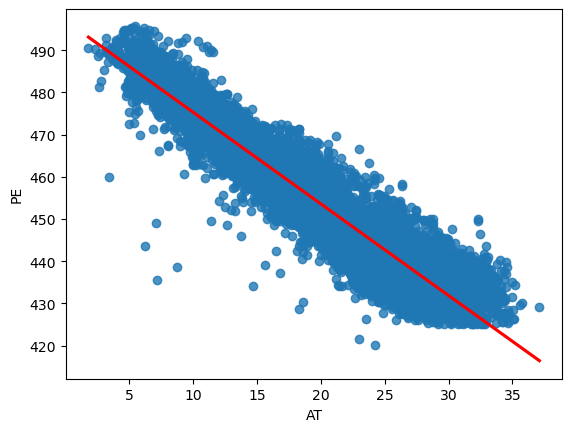

In [8]:
sns.regplot(x='AT', y='PE', data=df, line_kws={'color':'red'})

This plot clearly shows the negative linear relation between AT and PE. And support the statistically significant association.

<AxesSubplot:xlabel='AT'>

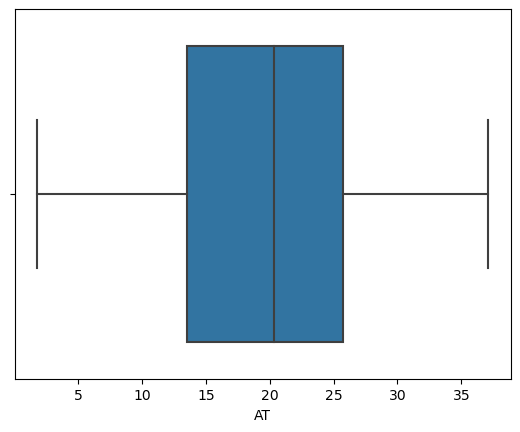

In [9]:
sns.boxplot(x=df['AT'])

there is no outlier we should remove for AT vs PE

V vs PE

In [10]:
x = sm.add_constant(df['V'])
model = sm.OLS(ytrain, x)
res = model.fit()
print(res.summary())
simplelr.append(res.params['V'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:31   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

We can see that R^2 is about 0.757 close to 1, and the p value is 0, <0.05, which means the null hypothesis is rejected, and there is a statistically significant
association between the predictor and the response in V vs PE.Our model is good enough to show this relation.

<AxesSubplot:xlabel='V', ylabel='PE'>

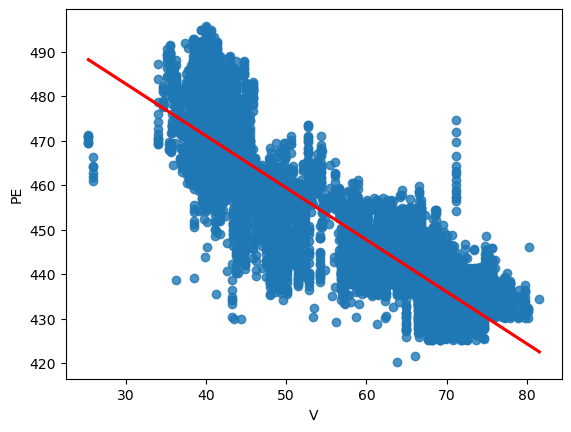

In [11]:
sns.regplot(x='V', y='PE', data=df, line_kws={'color':'red'})

This plot shows the negative relation between V and PE. And support the statistically significant association. Based on this plot and R^2, we can say the correlation between V and PE is not as strong as the correlation between AT and PE.

<AxesSubplot:xlabel='V'>

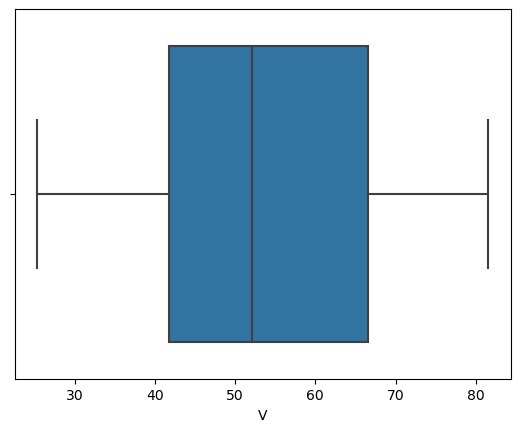

In [12]:
sns.boxplot(x=df['V'])

there is no outlier we should remove for AT vs PE

AP vs PE

In [13]:
x = sm.add_constant(df['AP'])
model = sm.OLS(ytrain, x)
res = model.fit()
print(res.summary())
simplelr.append(res.params['AP'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

The p value is 0, <0.05, which means the null hypothesis is rejected, and there is a statistically significant association between the predictor and the response in AP vs PE.
However, our R^2 is 0.269, not close to 1, which means our simple linear model can not represent the relation between AP and PE very well.

<AxesSubplot:xlabel='AP'>

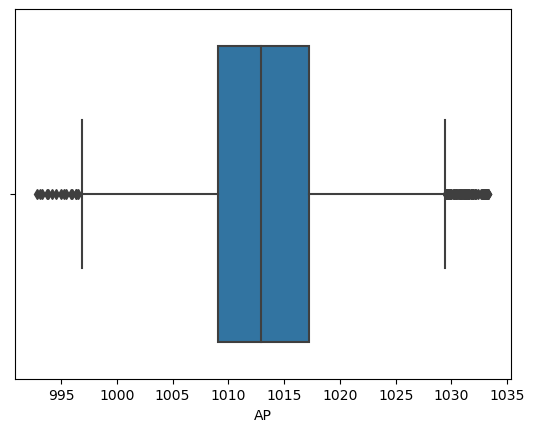

In [14]:
sns.boxplot(x=df['AP'])

In [15]:
q1 = np.percentile(df['AP'], 25)
q3 = np.percentile(df['AP'], 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = np.where((df['AP'] < q1 - threshold) | (df['AP'] > q3 + threshold))
print(outliers)
print(df['AP'].loc[outliers])

(array([ 238,  319,  368,  536,  571,  631,  669,  715,  753,  810,  847,
        983, 1091, 1250, 1290, 1388, 1583, 1660, 1808, 2003, 2060, 2298,
       2372, 2395, 2447, 2481, 2579, 2761, 2972, 2977, 2989, 3015, 3021,
       3066, 3213, 3412, 3443, 3483, 3492, 3766, 3796, 3955, 4067, 4125,
       4202, 4327, 4697, 4793, 4928, 5006, 5067, 5431, 5529, 5690, 5706,
       5805, 5840, 5863, 5928, 5956, 6006, 6346, 6581, 6708, 6789, 6829,
       6925, 7077, 7186, 7320, 7485, 7623, 7807, 7892, 8098, 8104, 8133,
       8270, 8379, 8411, 8462, 8568, 9060, 9068, 9159, 9267, 9342, 9366],
      dtype=int64),)
238     1030.46
319     1033.25
368     1030.18
536     1031.10
571     1029.65
         ...   
9068     992.89
9159    1031.71
9267    1031.21
9342    1031.32
9366    1030.61
Name: AP, Length: 88, dtype: float64


Those 88 outliers should be removed for better regression.

RH vs PE

In [16]:
x = sm.add_constant(df['RH'])
model = sm.OLS(ytrain, x)
res = model.fit()
print(res.summary())
simplelr.append(res.params['RH'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

The p value is 0, <0.05, which means the null hypothesis is rejected, and there is a statistically significant association between the predictor and the response in RH vs PE. However, our R^2 is 0.152, not close to 1, which means our simple linear model can not represent the relation between RH and PE very well.

<AxesSubplot:xlabel='RH'>

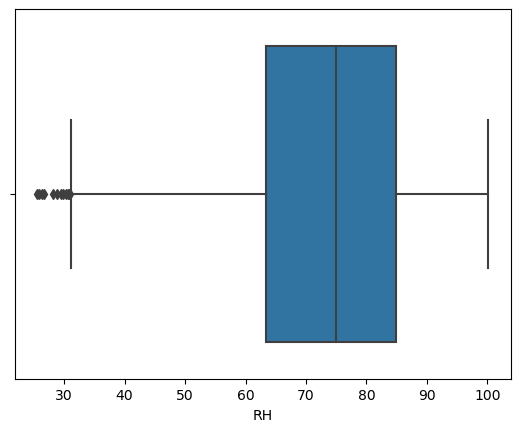

In [17]:
sns.boxplot(x=df['RH'])

In [18]:
q1 = np.percentile(df['RH'], 25)
q3 = np.percentile(df['RH'], 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = np.where((df['RH'] < q1 - threshold) | (df['RH'] > q3 + threshold))
print(outliers)
print(df['RH'].loc[outliers])

(array([ 789, 2262, 3603, 4367, 6472, 7983, 8061, 8737, 8751, 9015, 9074,
       9075], dtype=int64),)
789     25.89
2262    28.16
3603    29.43
4367    26.67
6472    29.86
7983    30.59
8061    25.56
8737    30.83
8751    28.81
9015    26.30
9074    30.34
9075    30.99
Name: RH, dtype: float64


Those outliers should be removed for better regression.

### (d) Multiple Regression

In [19]:
multireg = []
x = sm.add_constant(df[['AT', 'V', 'AP', 'RH']])
model = sm.OLS(ytrain, x)
res = model.fit()
print(res.summary())
multireg.append(res.params['AT'])
multireg.append(res.params['V'])
multireg.append(res.params['AP'])
multireg.append(res.params['RH'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

We can see that the p values of all four predictors: AT, V, AP, RH are about 0.000 < 0.05. For all four predictors we can reject the null hypothesis
H0 : βj = 0. This shows all four independent variables have statistically significant association with 'PE'.
With R^2 = 0.929 close to 1, we can say that our multi regression model represent the relation between independent variable and dependent variable well enough.

### (e) 1c Compare to 1d

In [20]:
coefficients = pd.DataFrame({'features':['AT','V','AP','RH'],'simple': simplelr,'multi': multireg})
coefficients

,features,simple,multi
0,AT,-2.171320,-1.977513
1,V,-1.168135,-0.233916
2,AP,1.489872,0.062083
3,RH,0.455650,-0.158054


Text(0, 0.5, 'multiple regression coefficients')

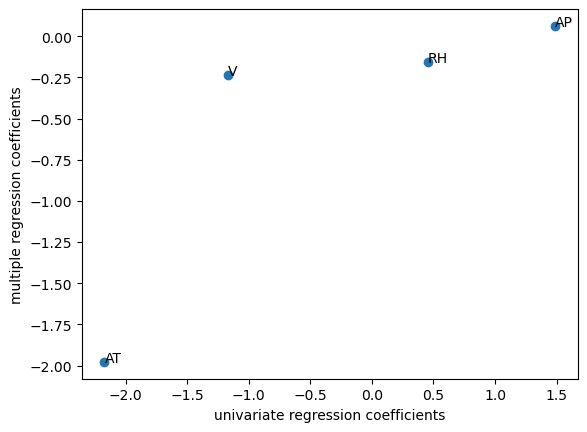

In [21]:
features=['AT','V','AP','RH']
i=0
fig, ax = plt.subplots()
ax.scatter(simplelr, multireg)
for each in features:
    ax.annotate(each, (simplelr[i], multireg[i]))
    i+=1
plt.xlabel('univariate regression coefficients')
plt.ylabel('multiple regression coefficients')

In both univariate regression and multiple regression, AT has high negative coefficient value with PE. However, compare with the coefficient values in univariate regression, V, AP, RH have coefficient values much closer to 0 in multiple regression.

### (f) Nonlinear Association

In [22]:
x = df[['AT']]
#print(x)
poly = PolynomialFeatures(degree=3)
xpoly = poly.fit_transform(x)

model = sm.OLS(df['PE'], xpoly)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

We can see that the p values for β0, β1, β2, β3 are all 0.000 <0.05. We can reject all the null hypothesis for each β. That means there is enough evidence of nonlinear association between AT and PE.

In [23]:
x = df[['V']]
#print(x)
poly = PolynomialFeatures(degree=3)
xpoly = poly.fit_transform(x)

model = sm.OLS(df['PE'], xpoly)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

We can see that the p values for β3 is 0.014 <0.05. We can reject the null hypothesis for β3. That means there is enough evidence of nonlinear association between V and PE.

In [24]:
x = df[['AP']]
#print(x)
poly = PolynomialFeatures(degree=3)
xpoly = poly.fit_transform(x)

model = sm.OLS(df['PE'], xpoly)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

We can see that the p values for β0, β1, β2, β3 are all 0.000 <0.05. We can reject all the null hypothesis for each β. That means there is enough evidence of nonlinear association between AP and PE.

In [25]:
x = df[['RH']]
#print(x)
poly = PolynomialFeatures(degree=3)
xpoly = poly.fit_transform(x)

model = sm.OLS(df['PE'], xpoly)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

We can see that the p values for β0, β1, β2, β3 are all 0.000 <0.05. We can reject all the null hypothesis for each β. That means there is enough evidence of nonlinear association between RH and PE.

All the features AT, V, AP, RH have statistically significant coefficients that associate with parameters that higher than linear relation. So there are evidences of nonlinear association between any of the predictors and the
response.

### (g) Interactions of Predictors

In [26]:
x = df[['AT', 'V', 'AP', 'RH']]
poly = PolynomialFeatures(interaction_only=True)
xpoly = poly.fit_transform(x)
xpoly = pd.DataFrame(xpoly, columns = ['const','AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH'])
xpoly

,const,AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH
0,1.0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,1.0,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,1.0,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,1.0,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,1.0,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026
...,...,...,...,...,...,...,...,...,...,...,...
9563,1.0,16.65,49.69,1014.01,91.00,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100
9564,1.0,13.19,39.18,1023.67,66.78,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826
9565,1.0,31.32,74.33,1012.92,36.48,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216
9566,1.0,24.48,69.45,1013.86,62.39,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254


In [27]:
model = sm.OLS(df['PE'], xpoly)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

We can see that the p value for all features and their interactions are less than 0.05 except AT 0.067, AT* AP 0.452, and V * RH 0.086. All other interactions: AT * V, AT * RH, V * AP and AP * RH have statistical significant association with PE. 

### (h) Improvement

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['AT', 'V', 'AP', 'RH']], df['PE'], test_size=0.3, random_state= 4)
xtrain

,AT,V,AP,RH
8365,25.88,63.73,1009.48,77.17
4199,23.26,63.56,1013.64,71.30
9547,8.02,40.23,1017.42,90.26
156,18.20,49.39,1018.83,96.30
5361,13.90,39.54,1007.01,81.33
...,...,...,...,...
456,27.91,72.24,1010.74,70.80
6017,6.80,41.16,1023.17,95.40
709,26.02,71.94,1009.38,64.12
8366,23.07,70.47,1008.64,83.37


In [29]:
x = sm.add_constant(xtrain)
model = sm.OLS(ytrain, x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.173e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -19673.
No. Observations:                6697   AIC:                         3.936e+04
Df Residuals:                    6692   BIC:                         3.939e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        449.5756     11.740     38.293      0.0

We can see that the p values of all four predictors: AT, V, AP, RH are about 0.000 < 0.05. For all four predictors we can reject the null hypothesis H0 : βj = 0. This shows all four independent variables have statistically significant association with 'PE'.

In [30]:
xtest = sm.add_constant(xtest)
ytrainpred = res.predict(x)
ytestpred = res.predict(xtest)
trainMSE = mean_squared_error(ytrain, ytrainpred)
testMSE = mean_squared_error(ytest, ytestpred)
print('trainMSE', trainMSE)
print('testMSE', testMSE)

trainMSE 20.84885322779306
testMSE 20.584714106522178


For all possible interaction terms and quadratic nonlinearities

In [31]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
xpoly = poly.fit_transform(df[['AT', 'V', 'AP', 'RH']])
xpoly = pd.DataFrame(xpoly, columns = ['const','AT', 'V', 'AP', 'RH', 'AT^2', 'AT*V', 'AT*AP', 'AT*RH', 'V^2', 'V*AP', 'V*RH', 'AP^2', 'AP*RH', 'RH^2'])
xpoly

,const,AT,V,AP,RH,AT^2,AT*V,AT*AP,AT*RH,V^2,V*AP,V*RH,AP^2,AP*RH,RH^2
0,1.0,14.96,41.76,1024.07,73.17,223.8016,624.7296,15320.0872,1094.6232,1743.8976,42765.1632,3055.5792,1.048719e+06,74931.2019,5353.8489
1,1.0,25.18,62.96,1020.04,59.08,634.0324,1585.3328,25684.6072,1487.6344,3963.9616,64221.7184,3719.6768,1.040482e+06,60263.9632,3490.4464
2,1.0,5.11,39.40,1012.16,92.14,26.1121,201.3340,5172.1376,470.8354,1552.3600,39879.1040,3630.3160,1.024468e+06,93260.4224,8489.7796
3,1.0,20.86,57.32,1010.24,76.64,435.1396,1195.6952,21073.6064,1598.7104,3285.5824,57906.9568,4393.0048,1.020585e+06,77424.7936,5873.6896
4,1.0,10.82,37.50,1009.23,96.62,117.0724,405.7500,10919.8686,1045.4284,1406.2500,37846.1250,3623.2500,1.018545e+06,97511.8026,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,1.0,16.65,49.69,1014.01,91.00,277.2225,827.3385,16883.2665,1515.1500,2469.0961,50386.1569,4521.7900,1.028216e+06,92274.9100,8281.0000
9564,1.0,13.19,39.18,1023.67,66.78,173.9761,516.7842,13502.2073,880.8282,1535.0724,40107.3906,2616.4404,1.047900e+06,68360.6826,4459.5684
9565,1.0,31.32,74.33,1012.92,36.48,980.9424,2328.0156,31724.6544,1142.5536,5524.9489,75290.3436,2711.5584,1.026007e+06,36951.3216,1330.7904
9566,1.0,24.48,69.45,1013.86,62.39,599.2704,1700.1360,24819.2928,1527.3072,4823.3025,70412.5770,4332.9855,1.027912e+06,63254.7254,3892.5121


In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(xpoly, df['PE'], test_size=0.3, random_state= 4)
xtrain

,const,AT,V,AP,RH,AT^2,AT*V,AT*AP,AT*RH,V^2,V*AP,V*RH,AP^2,AP*RH,RH^2
8365,1.0,25.88,63.73,1009.48,77.17,669.7744,1649.3324,26125.3424,1997.1596,4061.5129,64334.1604,4918.0441,1.019050e+06,77901.5716,5955.2089
4199,1.0,23.26,63.56,1013.64,71.30,541.0276,1478.4056,23577.2664,1658.4380,4039.8736,64426.9584,4531.8280,1.027466e+06,72272.5320,5083.6900
9547,1.0,8.02,40.23,1017.42,90.26,64.3204,322.6446,8159.7084,723.8852,1618.4529,40930.8066,3631.1598,1.035143e+06,91832.3292,8146.8676
156,1.0,18.20,49.39,1018.83,96.30,331.2400,898.8980,18542.7060,1752.6600,2439.3721,50320.0137,4756.2570,1.038015e+06,98113.3290,9273.6900
5361,1.0,13.90,39.54,1007.01,81.33,193.2100,549.6060,13997.4390,1130.4870,1563.4116,39817.1754,3215.7882,1.014069e+06,81900.1233,6614.5689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,1.0,27.91,72.24,1010.74,70.80,778.9681,2016.2184,28209.7534,1976.0280,5218.6176,73015.8576,5114.5920,1.021595e+06,71560.3920,5012.6400
6017,1.0,6.80,41.16,1023.17,95.40,46.2400,279.8880,6957.5560,648.7200,1694.1456,42113.6772,3926.6640,1.046877e+06,97610.4180,9101.1600
709,1.0,26.02,71.94,1009.38,64.12,677.0404,1871.8788,26264.0676,1668.4024,5175.3636,72614.7972,4612.7928,1.018848e+06,64721.4456,4111.3744
8366,1.0,23.07,70.47,1008.64,83.37,532.2249,1625.7429,23269.3248,1923.3459,4966.0209,71078.8608,5875.0839,1.017355e+06,84090.3168,6950.5569


In [33]:
model = sm.OLS(ytrain, xtrain)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7209.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:32   Log-Likelihood:                -19201.
No. Observations:                6697   AIC:                         3.843e+04
Df Residuals:                    6682   BIC:                         3.853e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6669.4340   1471.792     -4.532      0.0

In [34]:

ytrainpred = res.predict(xtrain)
ytestpred = res.predict(xtest)
trainMSE = mean_squared_error(ytrain, ytrainpred)
testMSE = mean_squared_error(ytest, ytestpred)
print('trainMSE', trainMSE)
print('testMSE', testMSE)

trainMSE 18.10877253486902
testMSE 18.130149182753268


With the above p value, we can say that V, AT* AP, V^2, V * AP, V * RH are statistically insignificant to PE since their values > 0.05. 

model after drop insignificant, I keep V as it is original feature

In [35]:
xpoly = xpoly.drop(columns=['AT*AP', 'V^2', 'V*AP', 'V*RH'])
xpoly

,const,AT,V,AP,RH,AT^2,AT*V,AT*RH,AP^2,AP*RH,RH^2
0,1.0,14.96,41.76,1024.07,73.17,223.8016,624.7296,1094.6232,1.048719e+06,74931.2019,5353.8489
1,1.0,25.18,62.96,1020.04,59.08,634.0324,1585.3328,1487.6344,1.040482e+06,60263.9632,3490.4464
2,1.0,5.11,39.40,1012.16,92.14,26.1121,201.3340,470.8354,1.024468e+06,93260.4224,8489.7796
3,1.0,20.86,57.32,1010.24,76.64,435.1396,1195.6952,1598.7104,1.020585e+06,77424.7936,5873.6896
4,1.0,10.82,37.50,1009.23,96.62,117.0724,405.7500,1045.4284,1.018545e+06,97511.8026,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...
9563,1.0,16.65,49.69,1014.01,91.00,277.2225,827.3385,1515.1500,1.028216e+06,92274.9100,8281.0000
9564,1.0,13.19,39.18,1023.67,66.78,173.9761,516.7842,880.8282,1.047900e+06,68360.6826,4459.5684
9565,1.0,31.32,74.33,1012.92,36.48,980.9424,2328.0156,1142.5536,1.026007e+06,36951.3216,1330.7904
9566,1.0,24.48,69.45,1013.86,62.39,599.2704,1700.1360,1527.3072,1.027912e+06,63254.7254,3892.5121


In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(xpoly, df['PE'], test_size=0.3, random_state= 4)
xtrain

,const,AT,V,AP,RH,AT^2,AT*V,AT*RH,AP^2,AP*RH,RH^2
8365,1.0,25.88,63.73,1009.48,77.17,669.7744,1649.3324,1997.1596,1.019050e+06,77901.5716,5955.2089
4199,1.0,23.26,63.56,1013.64,71.30,541.0276,1478.4056,1658.4380,1.027466e+06,72272.5320,5083.6900
9547,1.0,8.02,40.23,1017.42,90.26,64.3204,322.6446,723.8852,1.035143e+06,91832.3292,8146.8676
156,1.0,18.20,49.39,1018.83,96.30,331.2400,898.8980,1752.6600,1.038015e+06,98113.3290,9273.6900
5361,1.0,13.90,39.54,1007.01,81.33,193.2100,549.6060,1130.4870,1.014069e+06,81900.1233,6614.5689
...,...,...,...,...,...,...,...,...,...,...,...
456,1.0,27.91,72.24,1010.74,70.80,778.9681,2016.2184,1976.0280,1.021595e+06,71560.3920,5012.6400
6017,1.0,6.80,41.16,1023.17,95.40,46.2400,279.8880,648.7200,1.046877e+06,97610.4180,9101.1600
709,1.0,26.02,71.94,1009.38,64.12,677.0404,1871.8788,1668.4024,1.018848e+06,64721.4456,4111.3744
8366,1.0,23.07,70.47,1008.64,83.37,532.2249,1625.7429,1923.3459,1.017355e+06,84090.3168,6950.5569


In [37]:
model = sm.OLS(ytrain, xtrain)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.007e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:59:33   Log-Likelihood:                -19210.
No. Observations:                6697   AIC:                         3.844e+04
Df Residuals:                    6686   BIC:                         3.852e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.024e+04   1111.143     -9.215      0.0

In [38]:
ytrainpred = res.predict(xtrain)
ytestpred = res.predict(xtest)
trainMSE = mean_squared_error(ytrain, ytrainpred)
testMSE = mean_squared_error(ytest, ytestpred)
print('trainMSE', trainMSE)
print('testMSE', testMSE)

trainMSE 18.155407124809503
testMSE 18.138660730526244


|| 4 original predictors | all interactions and quadratics | after drop |
| --- | --- | --- | --- |
|Train MSE| 20.84885322779306 | 18.10877253486902 | 18.155407124809503 |
| --- | --- | --- | --- |
|test MSE| 20.584714106522178 | 18.130149182753268 | 18.138660730526244|

Our test MSE decreased from about 20+ to about 18.13. Our p value stay in about 0.0, our predictors have statistically significant association with 'PE'. We can say our regression model is improved by involving possible interaction terms and quadratic nonlinearities. In each model, our training MSE is very close to testing MSE, that shows our models are not overfitting or underfitting.

### (i) KNN

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['AT', 'V', 'AP', 'RH']], df['PE'], test_size=0.3, random_state= 4)
xtrain

,AT,V,AP,RH
8365,25.88,63.73,1009.48,77.17
4199,23.26,63.56,1013.64,71.30
9547,8.02,40.23,1017.42,90.26
156,18.20,49.39,1018.83,96.30
5361,13.90,39.54,1007.01,81.33
...,...,...,...,...
456,27.91,72.24,1010.74,70.80
6017,6.80,41.16,1023.17,95.40
709,26.02,71.94,1009.38,64.12
8366,23.07,70.47,1008.64,83.37


raw

In [40]:
testMSE = []
trainMSE = []
onek= []
for k in range(1, 101):
    onek.append(1/k)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ytrainpred = knn.predict(xtrain)
    ytestpred = knn.predict(xtest)
    testMSE.append(mean_squared_error(ytest, ytestpred))
    trainMSE.append(mean_squared_error(ytrain, ytrainpred))
testMSE

[19.822652420759315,
 17.99533372518286,
 16.17496105112427,
 15.656883598920238,
 15.294711928944624,
 15.180454042339097,
 15.355884328151319,
 15.547733212513066,
 15.682442744602257,
 15.878057245907348,
 16.256359640577905,
 16.46083469730833,
 16.56248068998493,
 16.715803106895844,
 16.7660256937188,
 16.842852947851355,
 16.905167754143264,
 17.037903104587805,
 17.14604543418712,
 17.20369661224311,
 17.37737053899697,
 17.52709564827527,
 17.64760611578267,
 17.703057178042396,
 17.82271483792407,
 17.890304669888025,
 17.973194530853203,
 18.09645736948122,
 18.1762330040327,
 18.254981404737013,
 18.272109423054676,
 18.35222841929532,
 18.43295787308504,
 18.50543647243825,
 18.540318731665703,
 18.60105308039956,
 18.645680423565135,
 18.71111713387095,
 18.77020612065016,
 18.81345127566614,
 18.86332009750627,
 18.908669555157484,
 18.97864878875852,
 19.054485744323404,
 19.15431976252951,
 19.21050682086494,
 19.260910252633266,
 19.339135488838327,
 19.41780130073226

We can see that at k = 6, we have min test MSE = 15.180454042339097.

C:\Users\guanh\AppData\Local\Temp\ipykernel_20816\3878556763.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(1/6, 15.180454042339097,'ro',color ='green')


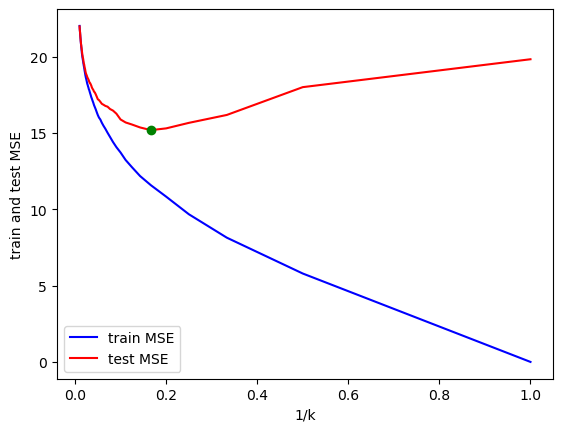

In [41]:
plt.plot(onek, trainMSE, color='blue',label='train MSE')
plt.plot(onek, testMSE, color='red',label='test MSE')
plt.plot(1/6, 15.180454042339097,'ro',color ='green') 
plt.xlabel('1/k')
plt.ylabel('train and test MSE')
plt.legend()

normalized

In [42]:
normdf = normalize(df[['AT', 'V', 'AP', 'RH']],axis=0)
normdf = pd.DataFrame(data=normdf, columns=['AT', 'V', 'AP', 'RH'])
normdf

,AT,V,AP,RH
0,0.007277,0.007655,0.010332,0.010007
1,0.012248,0.011541,0.010291,0.008080
2,0.002486,0.007222,0.010212,0.012602
3,0.010147,0.010507,0.010193,0.010482
4,0.005263,0.006874,0.010182,0.013215
...,...,...,...,...
9563,0.008099,0.009108,0.010231,0.012446
9564,0.006416,0.007182,0.010328,0.009133
9565,0.015235,0.013625,0.010220,0.004989
9566,0.011908,0.012730,0.010229,0.008533


In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(normdf[['AT', 'V', 'AP', 'RH']], df['PE'], test_size=0.3, random_state= 4)
ytrain

8365    438.42
4199    446.67
9547    484.22
156     455.86
5361    471.16
         ...  
456     430.73
6017    477.80
709     435.21
8366    439.04
1146    473.00
Name: PE, Length: 6697, dtype: float64

In [44]:
testMSE = []
trainMSE = []
onek= []
for k in range(1, 101):
    onek.append(1/k)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ytrainpred = knn.predict(xtrain)
    ytestpred = knn.predict(xtest)
    testMSE.append(mean_squared_error(ytest, ytestpred))
    trainMSE.append(mean_squared_error(ytrain, ytrainpred))
testMSE

[25.70280665273424,
 20.600379797979794,
 18.43582942838345,
 17.621310717084643,
 17.366166035527687,
 17.115219414451023,
 17.04217691339858,
 16.92362572383316,
 16.961380510941687,
 16.901964054336467,
 16.90178100670427,
 16.916071087309877,
 16.869338406921692,
 16.977830894269932,
 16.972428696930994,
 16.943369876975577,
 16.963076741523338,
 16.937072377887002,
 16.972710771677036,
 16.986723144897255,
 16.99217044982629,
 16.98557805534687,
 16.978282936594958,
 17.005780987618035,
 16.946932069327758,
 16.971628041123335,
 16.99608712086572,
 16.961926088293204,
 16.984813693290278,
 16.99188907302914,
 16.979099182684067,
 16.977508880494057,
 16.974007448635362,
 16.990595994095585,
 17.005901358497002,
 17.06127203965474,
 17.06255948390991,
 17.075014185748984,
 17.086387765798733,
 17.099014868425638,
 17.102276366943354,
 17.131382012990972,
 17.164414054892195,
 17.1807376691358,
 17.17913581745081,
 17.21185051675415,
 17.215795497709816,
 17.251613157375957,
 17.261

C:\Users\guanh\AppData\Local\Temp\ipykernel_20816\154336313.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(1/13, 16.869338406921692,'ro',color ='green')


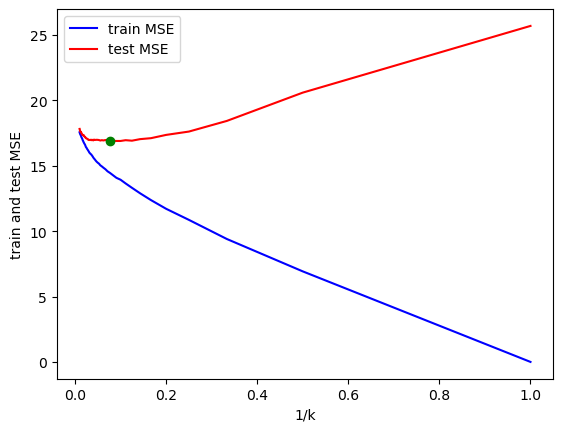

In [45]:
plt.plot(onek, trainMSE, color='blue',label='train MSE')
plt.plot(onek, testMSE, color='red',label='test MSE')
plt.plot(1/13, 16.869338406921692,'ro',color ='green') 
plt.xlabel('1/k')
plt.ylabel('train and test MSE')
plt.legend()

We can see that at k = 13, we have min test MSE = 16.869338406921692.

### (j ) Compare KNN and Linear

|| 4 original predictors | all interactions and quadratics | after drop | KNN raw | KNN normalized |
| --- | --- | --- | --- | --- | --- |
|Train MSE| 20.84885322779306 | 18.10877253486902 | 18.155407124809503 | k=1 MSE=0.0 | K=1 MSE=0.0|
| --- | --- | --- | --- | --- | --- |
|test MSE| 20.584714106522178 | 18.130149182753268 | 18.138660730526244| k=6 MSE=15.180454042339097 | k=13 MSE=16.869338406921692|

From the above table we can find that KNN regressor with raw data has the minimum test MSE over other models. At k = 6, the optimal testMSE =15.180454042339097. 
Based on above result we can conclude that KNN regressor(with random state= 4, k=6) with raw data perform better on this CCPP data over multiple linear regressor.

On this dataset, KNN regressor does not have to consider all the samples like linear regression models, at k=6, it only consider a few sample points that it nearest. Most prediction results avoid the effect from some outliers. And there are some correlations other than linear/quadratic that multi linear regressor can not explain. Similarly it avoids the curse of dimensionality that may arise when we add interaction terms and quadratic to the linear regression model. 

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

better. In the case of large sample sizes, the use of more flexible models can fit the data better since our sample may able to reflect all the features of the population. And since predictors p is small, varience is small.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

worse, this may result high varience and severe overfitting

### (c) The relationship between the predictors and response is highly non-linear.

better, a high flexible model can represent highly non-linear relation ship. Low-flexibility models have lower degrees of freedom and are usually inferior to high-flexibility models in higher order functions.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

worse, high flexible model is more likely to fit the noises, with high variance in error, it may do worse.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

obj1: 3
obj2: 2
obj3: sqrt(1+9) = 3.16227766
obj4: sqrt(5) = 2.23606798
obj5: sqrt(2) = 1.14121356
obj6: sqrt(3) = 1.7320508

### (b) What is our prediction with K = 1? Why?

k=1, nearest obj is obj5, prediction = green same as obj5

### (c) What is our prediction with K = 3? Why?

k=3, nearest 3 objs are obj5, obj6 and obj2, their colors are green, red, red (2 red, 1 green). Our prediction will be red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

small. As k be larger, our variance decreased and our decision boundary will become more flat and smooth. We seeking more flexible model for highly non-linear boundary, so we expect small k.

reference

https://www.askpython.com/python/examples/how-to-determine-outliers
https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
https://condor.depaul.edu/sjost/lsp121/documents/boxplots.htm#:~:text=Extreme%20outliers%20are%20data%20points,but%20are%20not%20extreme%20outliers.
https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
https://pandas.pydata.org/docs/reference/frame.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
https://medium.com/@cmukesh8688/evaluation-of-linear-regression-model-6e8edbb068f
https://hastie.su.domains/ISLR2/ISLRv2_website.pdf